---
#### Train
---

In [18]:
import sys
import pandas as pd
import os
import numpy as np
import time
import pickle
import warnings
from datetime import date, timedelta, datetime
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout, Conv1D, GlobalMaxPool1D, SimpleRNN
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Using TensorFlow backend.


---
#### 일단 네이블 통해 받은 데이터로 훈련을 한다.
---

In [121]:

def create_dataset(signal_data, look_back = 144):
    dataX, dataY = [], []
    for i in range(len(signal_data)-156):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[(i + look_back):(i+156), 0])
    return np.array(dataX), np.array(dataY)

look_back = 144 ## 하루. 

train = ct[['ACTIVE_USER']].values.reshape(-1,1)
x_train, y_train = create_dataset(train, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(SimpleRNN(144, return_sequences= True))
model.add(BatchNormalization())
model.add(SimpleRNN(144))
model.add(Dense(12, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# earlyStopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min')
# mcp_save = ModelCheckpoint('/data01/CSB/CSB_Jupyter/PROBE/Pyfile/CSB-Modelling/10월16일/TANGO/best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

hist = model.fit(x_train/1e3, y_train/1e3, epochs=10, batch_size = 2)

NameError: name 'x_trai' is not defined

#### model 저장

In [48]:
model.save('Slice01-prediction-active-user.h5')

#### 모델 제대로 돌아가는지 test 용

In [55]:
prediction = ct[['ACTIVE_USER']][10:154].values
    
    
result = model.predict(np.reshape(prediction,(1,144,1))/1e3)*1e3

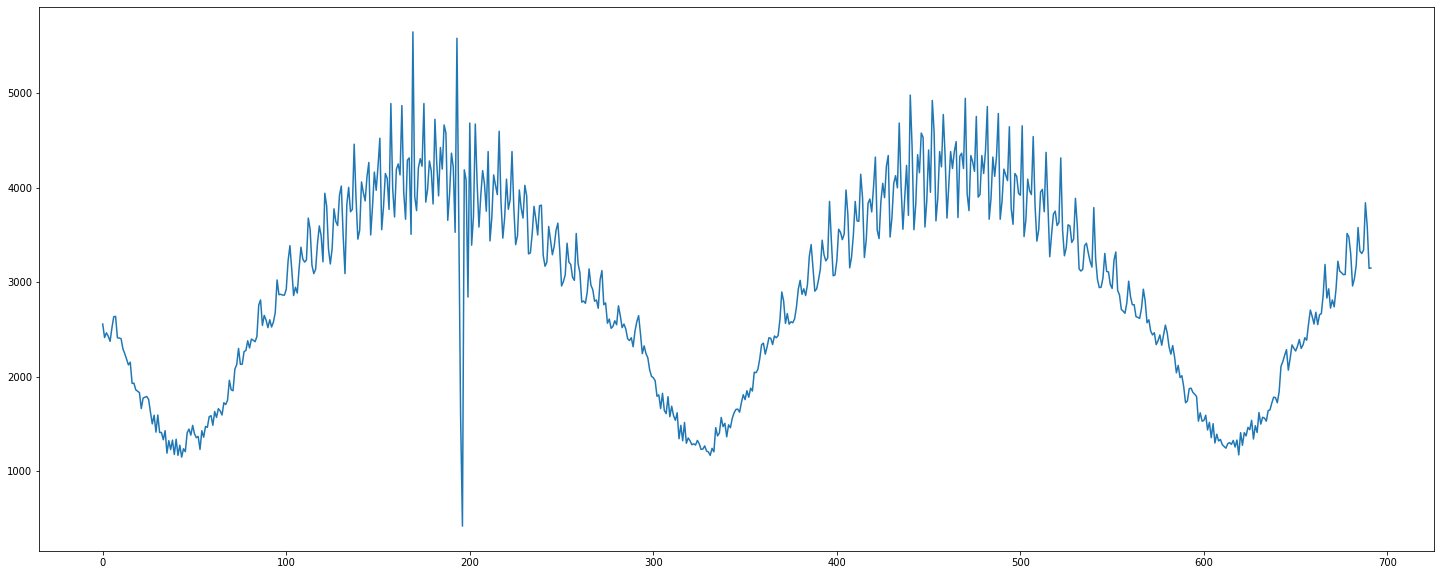

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(ct[['ACTIVE_USER']])
plt.show()

In [51]:
ct[['ACTIVE_USER']]

,ACTIVE_USER
0,2556
1,2413
2,2463
3,2427
4,2373
...,...
687,3340
688,3840
689,3589
690,3145


In [56]:
test = pd.DataFrame(result[0])
test.columns =['ACTIVE_USER']

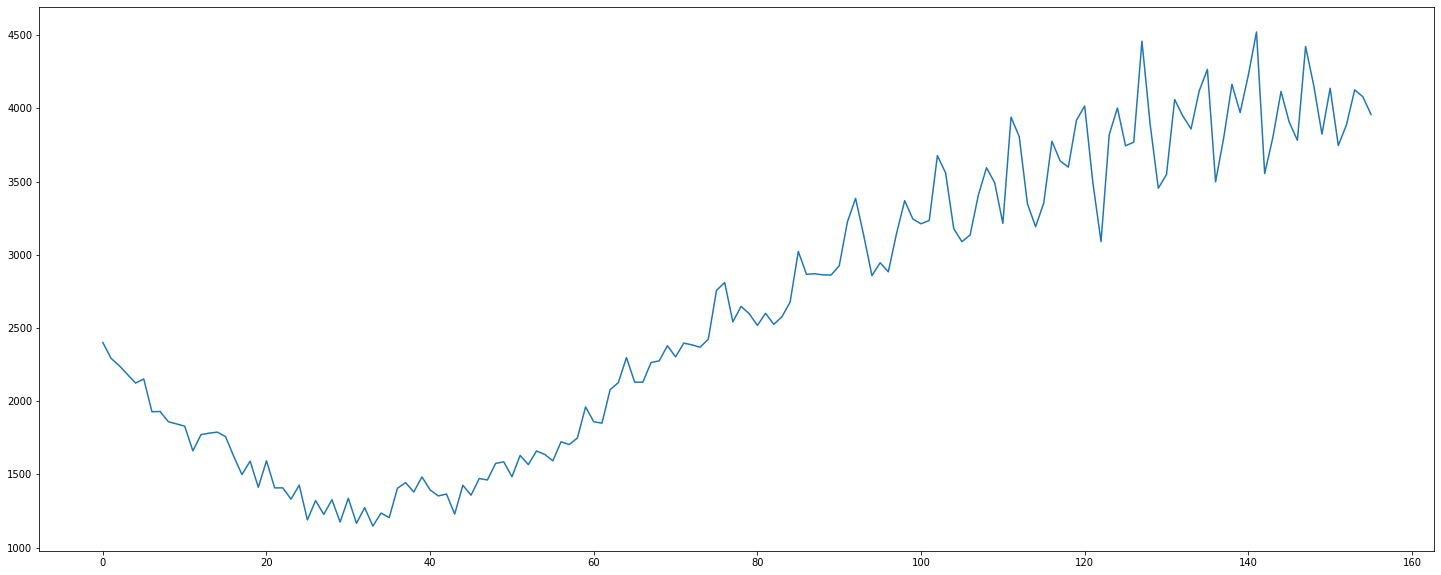

In [57]:
plt.figure(figsize=(25,10))
plt.plot(pd.concat([ct[['ACTIVE_USER']][10:154],test]).reset_index(drop=True))

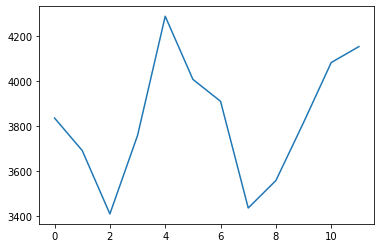

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(result[0])
